In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df.isnull()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9238,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [7]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
df.shape

(9240, 37)

In [9]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Convert "Select" values to NaN
df = df.replace('Select',np.nan)

In [11]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
# Check Null Values in DataFrame
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# lets check if missing values has more 40-45% of null values before dropping them.
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# drop columns with more than 45% null values

col = df.columns
for i in col:
    if((100*(df[i].isnull().sum()/len(df.index))) >=45):
        df.drop(i,1,inplace = True)

In [15]:
# Lets recheck this
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [17]:
# India seems to be on the higher side of survey, lets try to plot and see them.
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

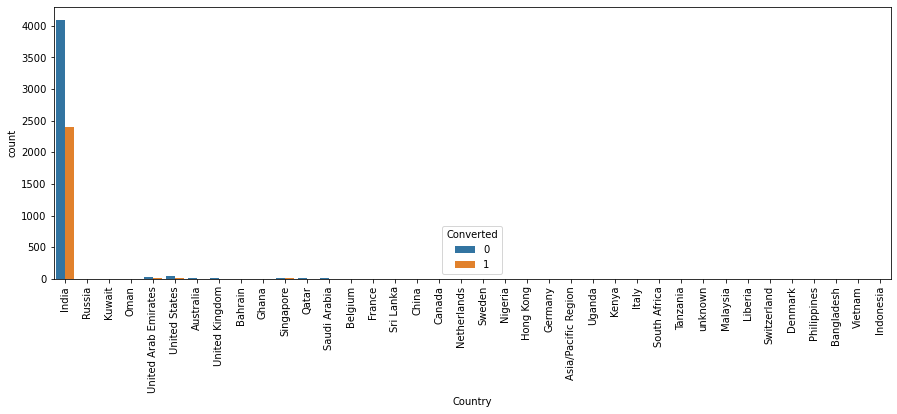

In [19]:
plt.figure(figsize=(15,5))
sx = sns.countplot(df.Country,hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
#fig.update_xaxes(tickangle = 90)
plt.show()

In [20]:
# Based on the above plot we see India has the highest number of survey, 
# therefore we can impute the missing values as India

df['Country'] = df['Country'].replace(np.nan,'India')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


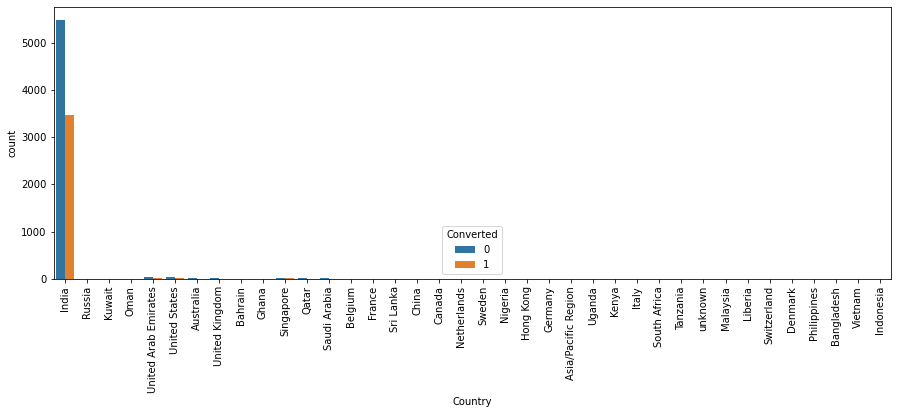

In [21]:
plt.figure(figsize=(15,5))
sx = sns.countplot(df.Country,hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
#fig.update_xaxes(tickangle = 90)
plt.show()

In [22]:
# Since the maximum data is coming from India which almost 96% of the entire Data, so better to drop Country
df['Country'].value_counts(normalize = True)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
China                   0.000216
Asia/Pacific Region     0.000216
Uganda                  0.000216
Bangladesh              0.000216
Italy                   0.000216
Belgium                 0.000216
Netherlands             0.000216
Ghana                   0.000216
Philippines             0.000216
Russia                  0.000108
Switzerland             0.000108
Vietnam   

In [23]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [24]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [25]:
# Checking null value in specialisation
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
# Lets update null values has Not Updated
df['Specialization'] = df['Specialization'].replace(np.nan,'Not Updated')

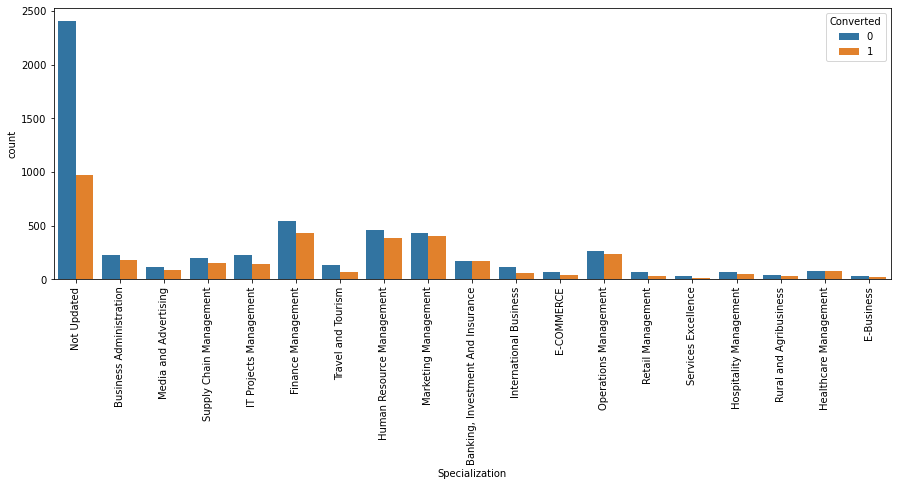

In [27]:
plt.figure(figsize=(15,5))
sx = sns.countplot(df.Specialization,hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
#fig.update_xaxes(tickangle = 90)
plt.show()

In [28]:
df['Specialization'].value_counts(dropna = False)

Not Updated                          3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
# lets combine all the management specialization as one called as just Management
df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                     'Marketing Management','Operations Management',
                                                    'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                    'Retail Management'],'Management')

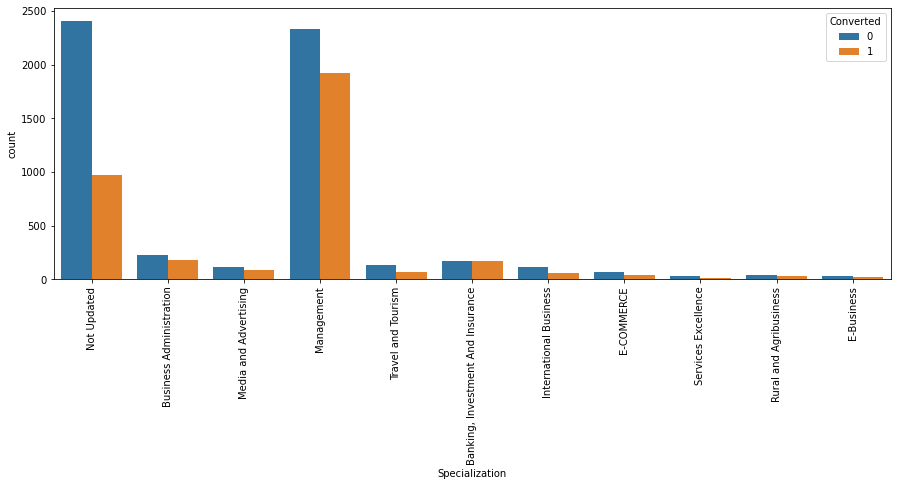

In [30]:
plt.figure(figsize=(15,5))
sx = sns.countplot(df.Specialization,hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [31]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [32]:
# lets check for City column
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
df['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

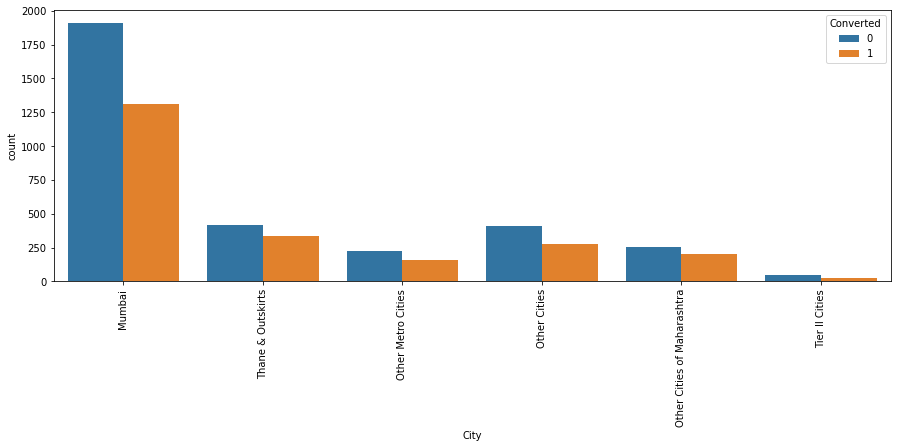

In [34]:
plt.figure(figsize=(15,5))
sx = sns.countplot(df.City,hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [35]:
# Lets update null values has Mumbai Since the Mod is showing as Mumbai 
df['City'] = df['City'].replace(np.nan,'Mumbai')

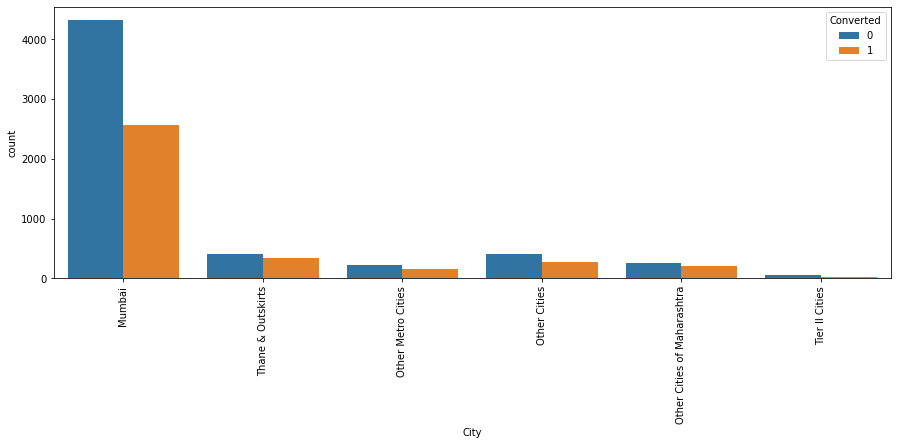

In [36]:
plt.figure(figsize=(15,5))
sx = sns.countplot(df.City,hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [37]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [38]:
# Drop the unique values Propect id & Lead Number
df.drop(['Prospect ID','Lead Number'],1,inplace=True)

In [39]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [40]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
# check for null values in 'What is your current occupation' 
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [42]:
# impute the null values with Mode which unemployed
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [43]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

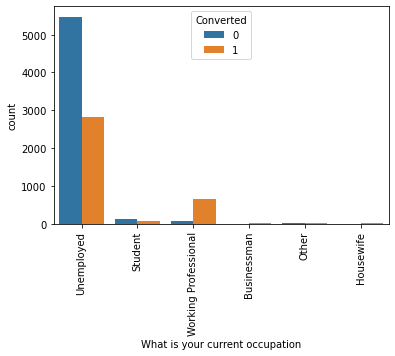

In [44]:
# Lets Visualise the What is your current occupation
#plt.figure(figsize=(15,5))
sx = sns.countplot(df['What is your current occupation'],hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [45]:
# check for null values in 'What is your current occupation' 
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [46]:
# impute the null values with Mode which Better Career Prospects
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [47]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

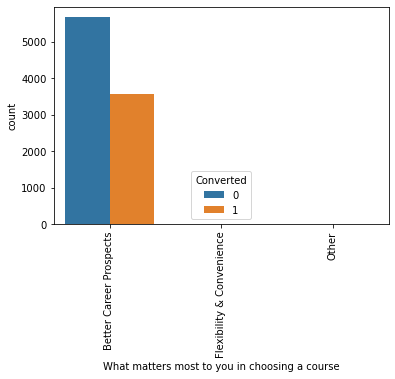

In [48]:
sx = sns.countplot(df['What matters most to you in choosing a course'],hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [49]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [51]:
# impute the null values as not updated
df['Tags'] = df['Tags'].replace(np.nan, 'Not Updated')

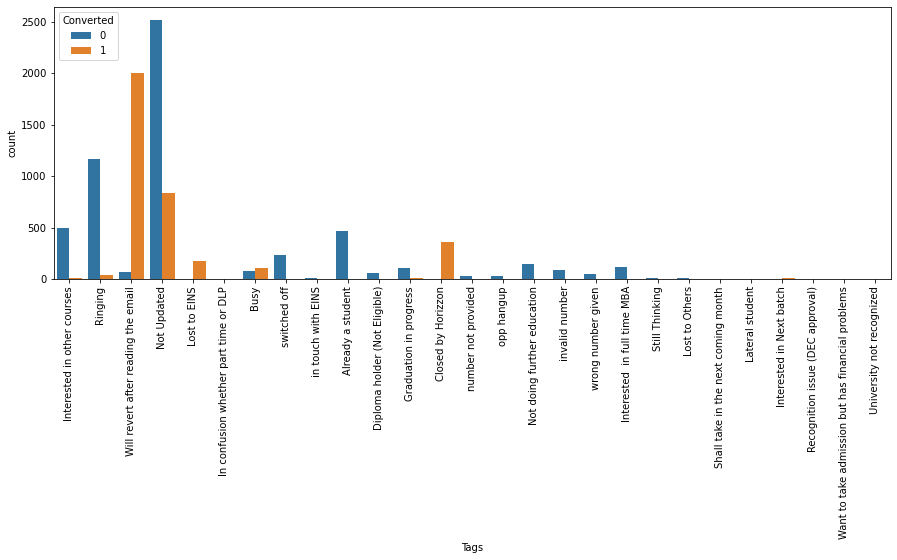

In [52]:
plt.figure(figsize=(15,5))
sx = sns.countplot(df.Tags,hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [53]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [54]:
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [55]:
#replace & put familiar variables into a bucket, example Facebook can be included to Social Media
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'] = df['Lead Source'].replace('Social Media', 'Facebook')

In [56]:
df['Lead Source'] = df['Lead Source'].replace(['Click2call','bing','Live Chat','Press_Release','welearnblog_Home',
                                              'youtubechannel','testone','NC_EDM','Pay per Click Ads',
                                              'testone','blog','WeLearn'], 'Other_Source')

In [57]:
df['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              57
NaN                   36
Other_Source          21
Name: Lead Source, dtype: int64

In [58]:
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

In [59]:
df['Lead Source'].value_counts(dropna=False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              57
Other_Source          21
Name: Lead Source, dtype: int64

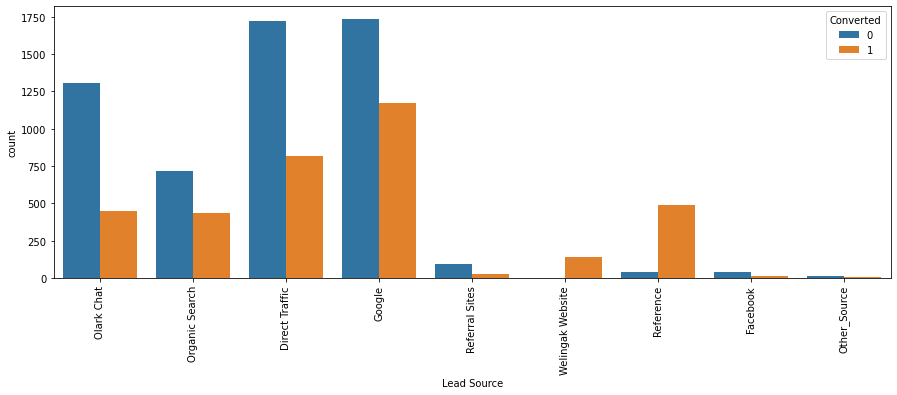

In [60]:
plt.figure(figsize=(15,5))
sx = sns.countplot(df['Lead Source'],hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [61]:
df['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

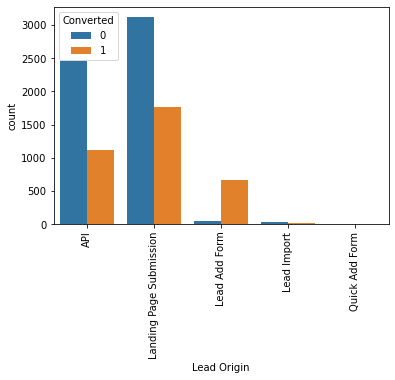

In [62]:
#plt.figure(figsize=(15,5))
sx = sns.countplot(df['Lead Origin'],hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [63]:
df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [64]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                  'Approached upfront','View in browser link Clicked',
                                                  'Email Marked Spam','Email Received','Visited Booth in Tradeshow',
                                                  'Resubscribed to emails'],'Others')

In [65]:
df['Last Activity'].value_counts(dropna = False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
NaN                           103
Name: Last Activity, dtype: int64

In [66]:
df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Others')

In [67]:
df['Last Activity'].value_counts(dropna = False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

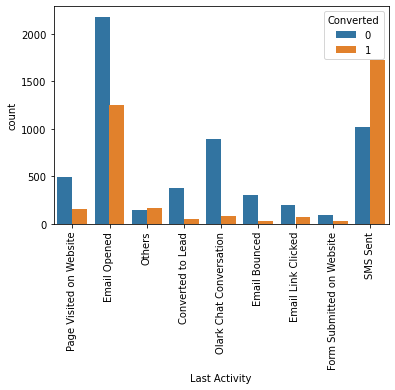

In [68]:
#plt.figure(figsize=(15,5))
sx = sns.countplot(df['Last Activity'],hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [69]:
df['Last Notable Activity'].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [70]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                  'Approached upfront','View in browser link Clicked',
                                                  'Email Marked Spam','Email Received',
                                                  'Resubscribed to emails','Form Submitted on Website'],'Others')

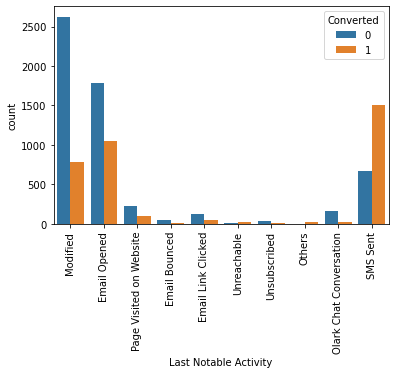

In [71]:
#plt.figure(figsize=(15,5))
sx = sns.countplot(df['Last Notable Activity'],hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [72]:
# lets check the null for DF
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [73]:
# now after all the EDA previously done, now we see the null value % is less than 2%, dropping all the null values would n
# effect our model buiulding

df = df.dropna()

In [74]:
# lets check now
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

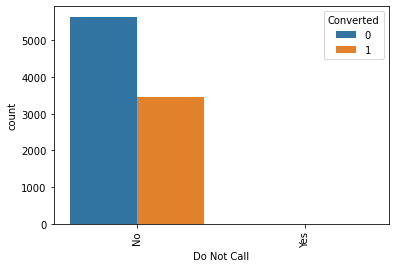

In [75]:
sx = sns.countplot(df['Do Not Call'],hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [76]:
df['Do Not Call'].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

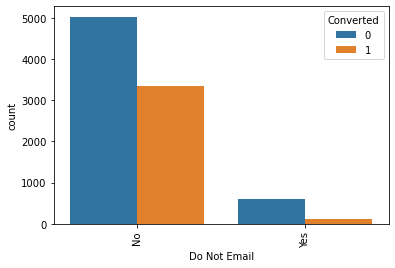

In [77]:
sx = sns.countplot(df['Do Not Email'],hue=df.Converted)
sx.set_xticklabels(sx.get_xticklabels(),rotation=90)
plt.show()

In [78]:
df['Do Not Email'].value_counts()

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [79]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [80]:
# Since the Do Not Call is more than 90% is only value, lets append it to the list column that we have planned to drop.
df['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [81]:
df['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [82]:
# Append to the list of the column that needs to be dropped
drop_col = ['Do Not Call']
drop_col

['Do Not Call']

In [83]:
# would be good to drop this as well
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9101
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [84]:
drop_col.append('What matters most to you in choosing a course')
drop_col

['Do Not Call', 'What matters most to you in choosing a course']

In [85]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [86]:
df['Magazine'].value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [87]:
drop_col.append('Magazine')
drop_col

['Do Not Call', 'What matters most to you in choosing a course', 'Magazine']

In [88]:
df['Search'].value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [89]:
drop_col.append('Search')
drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Magazine',
 'Search']

In [90]:
df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [91]:
drop_col.append('Newspaper Article')
drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Magazine',
 'Search',
 'Newspaper Article']

In [92]:
df['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [93]:
drop_col.append('Newspaper')
drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Magazine',
 'Search',
 'Newspaper Article',
 'Newspaper']

In [94]:
df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [95]:
drop_col.append('X Education Forums')
drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Magazine',
 'Search',
 'Newspaper Article',
 'Newspaper',
 'X Education Forums']

In [96]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [97]:
drop_col.append('Digital Advertisement')
drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Magazine',
 'Search',
 'Newspaper Article',
 'Newspaper',
 'X Education Forums',
 'Digital Advertisement']

In [98]:
df['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [99]:
drop_col.append('Through Recommendations')
drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Magazine',
 'Search',
 'Newspaper Article',
 'Newspaper',
 'X Education Forums',
 'Digital Advertisement',
 'Through Recommendations']

In [100]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [101]:
drop_col.append('Receive More Updates About Our Courses')
drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Magazine',
 'Search',
 'Newspaper Article',
 'Newspaper',
 'X Education Forums',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses']

In [102]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [103]:
drop_col.append('Update me on Supply Chain Content')
drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Magazine',
 'Search',
 'Newspaper Article',
 'Newspaper',
 'X Education Forums',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content']

In [104]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [105]:
drop_col.append('Get updates on DM Content')
drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Magazine',
 'Search',
 'Newspaper Article',
 'Newspaper',
 'X Education Forums',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content']

In [106]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [107]:
drop_col.append('I agree to pay the amount through cheque')
drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Magazine',
 'Search',
 'Newspaper Article',
 'Newspaper',
 'X Education Forums',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [108]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [109]:
# List of columns needs to be dropped, Country has already been dropped at initial stage
drop_col

['Do Not Call',
 'What matters most to you in choosing a course',
 'Magazine',
 'Search',
 'Newspaper Article',
 'Newspaper',
 'X Education Forums',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [110]:
# Drop the columns
df = df.drop(drop_col,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Country                                 9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

In [111]:
#% converted value having 1
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.02043282434362

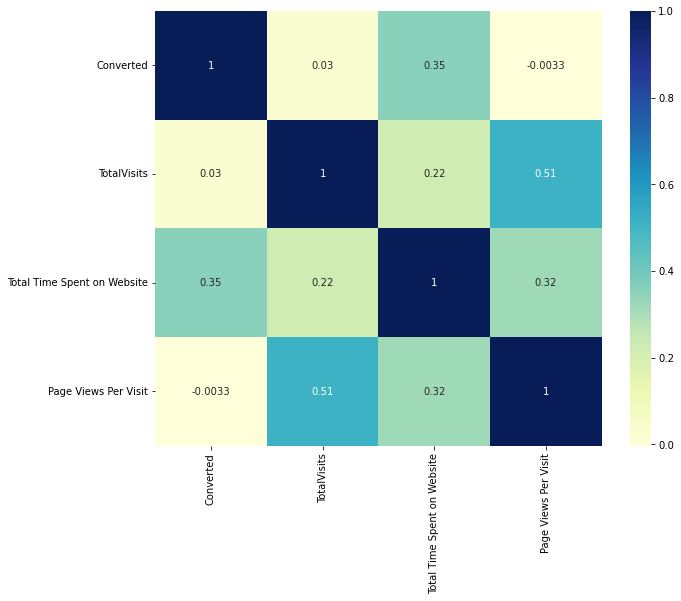

In [112]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='YlGnBu',annot = True)
plt.show()

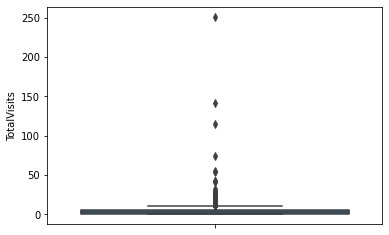

In [113]:
#plt.figure(figsize=(10,8))
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [114]:
df['TotalVisits'].describe(percentiles=[0.05,.25,.5,.75,.90,.95,.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

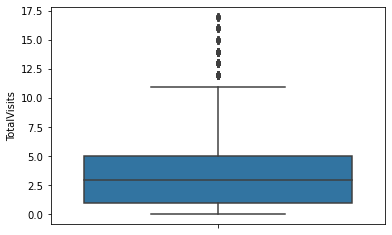

In [115]:
# there seems to be a lot of outliers. So an outlier treatment needs to be done from Top Bottom.

Q_3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q_3)]

Q_1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q_1)]

sns.boxplot(y=df['TotalVisits'])
plt.show()

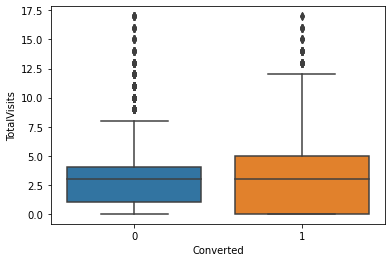

In [116]:
# check for Total Visits Versus the Convertion
sns.boxplot(y='TotalVisits', x = 'Converted', data = df)
plt.show()

In [117]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

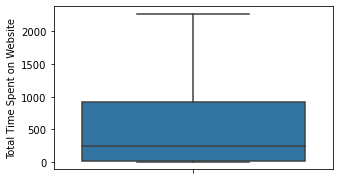

In [118]:
plt.figure(figsize=(5,3))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

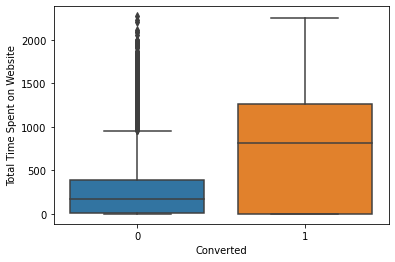

In [119]:
# check for Total Time Spent on Website Versus the Convertion
sns.boxplot(y='Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

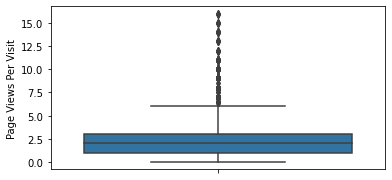

In [120]:
plt.figure(figsize=(6,3))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

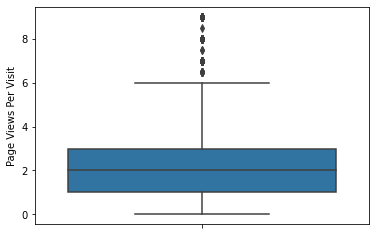

In [121]:
# there seems to be a lot of outliers. So an outlier treatment needs to be done from Top Bottom.

Q_3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q_3]

Q_1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q_1]

sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

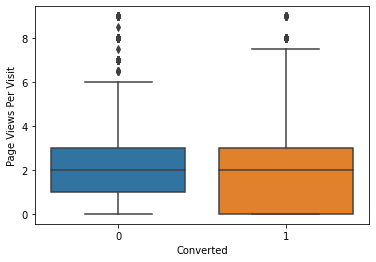

In [122]:
# check for Page Views Per Visit Versus the Convertion
sns.boxplot(y='Page Views Per Visit', x = 'Converted', data = df)
plt.show()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Country                                 8953 non-null   object 
 9   Specialization                          8953 non-null   object 
 10  What is your current occupation         8953 non-null   obje

In [124]:
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [125]:
# Lets get the list of categorial columns

cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [126]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview', 'Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [127]:
# get Dummy Variables

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation','City']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [128]:
# Creating dummy variables for the remaining categorical variables and dropping.

dummy1 = pd.get_dummies(df['Specialization'], prefix='Specialization')
dummy1 = dummy1.drop(['Specialization_Not Updated'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,dummy1], axis=1)

In [129]:
#Lead Source
dummy2 = pd.get_dummies(df['Lead Source'], prefix='Lead Source')
dummy2 = dummy2.drop(['Lead Source_Other_Source'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,dummy2], axis=1)

In [130]:
#Last Activity
dummy3 = pd.get_dummies(df['Last Activity'], prefix='Last Activity')
dummy3 = dummy3.drop(['Last Activity_Others'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,dummy3], axis=1)

In [131]:
#Last Notable activity
dummy3 = pd.get_dummies(df['Last Notable Activity'], prefix='Last Notable Activity')
dummy3 = dummy3.drop(['Last Notable Activity_Others'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,dummy3], axis=1)

In [132]:
#Tags
dummy4 = pd.get_dummies(df['Tags'], prefix='Tags')
dummy4 = dummy4.drop(['Tags_Not Updated'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,dummy4], axis=1)

In [133]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Not Updated,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Not Updated,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,...,0,0,0,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,India,Media and Advertising,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Not Updated,...,0,0,0,1,0,0,0,0,0,0


In [134]:
df.drop(cat_cols,1,inplace=True)

In [135]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [136]:
from sklearn.model_selection import train_test_split

In [137]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [138]:
X = df.drop('Converted', axis = 1)

In [139]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [140]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 77 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   TotalVisits                                             6267 non-null   float64
 1   Total Time Spent on Website                             6267 non-null   int64  
 2   Page Views Per Visit                                    6267 non-null   float64
 3   Lead Origin_Landing Page Submission                     6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                               6267 non-null   uint8  
 5   Lead Origin_Lead Import                                 6267 non-null   uint8  
 6   What is your current occupation_Housewife               6267 non-null   uint8  
 7   What is your current occupation_Other                   6267 non-null   uint8  
 8   What is your current occupation_Stu

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()
number_Cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[number_Cols] = scaler.fit_transform(X_train[number_Cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [150]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [151]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1135.4
Date:                Mon, 02 Jan 2023   Deviance:                       2270.8
Time:                        18:59:48   Pearson chi2:                 1.19e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6195
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.4552      2.601      0.175      0.861      -4.643       5.553
TotalVisits                                                0.2451      0.079      3.119      0.002       0.091       0.399
Total Time Spent on Website                                1.0924      0.065     16.682      0.000       0.964       1.221
Page Views Per Visit                                      -0.3041      0.099     -3.080      0.002      -0.498      -0.111
Lead Origin_Landing Page Submission                       -0.6103      0.243     -2.506      0.012      -1.087      -0.133
Lead Origin_Lead Add Form                                  2.1577      1.042      2.071      0.038       0.116       4.200
Lead Origin_Lead Import                                   25.2048   6.77e+04      0.000      1.000   -1.33e+05    1.33e+05
What is your current occupation_Housewife                 21.2656   5.41e+04      0.000      1.000   -1.06e+05    1.06e+05
What is your current occupation_Other                     -0.9520      2.356     -0.404      0.686      -5.570       3.666
What is your current occupation_Student                    0.2483      1.801      0.138      0.890      -3.281       3.778
What is your current occupation_Unemployed                -0.2066      1.666     -0.124      0.901      -3.471       3.058
What is your current occupation_Working Professional       0.7969      1.713      0.465      0.642      -2.560       4.154
City_Other Cities                                          0.2655      0.238      1.118      0.264      -0.200       0.731
City_Other Cities of Maharashtra                          -0.1311      0.297     -0.442      0.659      -0.713       0.450
City_Other Metro Cities                                   -0.0197      0.323     -0.061      0.951      -0.652       0.613
City_Thane & Outskirts                                    -0.1242      0.236     -0.526      0.599      -0.587       0.339
City_Tier II Cities                                        0.3303      0.650      0.508      0.611      -0.944       1.605
Specialization_Banking, Investment And Insurance           0.4401      0.375      1.174      0.240      -0.295       1.175
Specialization_Business Administration                    -0.0608      0.360     -0.169      0.866      -0.766       0.645
Specialization_E-Business                                 -0.0160      0.668     -0.024      0.981      -1.325       1.292
Specialization_E-COMMERCE                                  0.3569      0.521      0.685      0.494      -0.665       1.378
Specialization_International Business                     -0.1907      0.483     -0.395      0.693      -1.137       0.756
Speciali

In [160]:
# Lets try with 15 Variables

logreg = LogisticRegression()



In [175]:
#import RFE
from sklearn.feature_selection import RFE

In [176]:
# Lets try with 15 Variables
log_rg = LogisticRegression()

RFE = RFE(estimator=log_rg,n_features_to_select=15)
RFE = RFE.fit(X_train,y_train)

In [178]:
RFE.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True, False,  True,  True])

In [180]:
list(zip(X_train.columns, RFE.support_, RFE.ranking_))

[('TotalVisits', False, 43),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 42),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 32),
 ('What is your current occupation_Housewife', False, 45),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 36),
 ('What is your current occupation_Unemployed', False, 35),
 ('What is your current occupation_Working Professional', False, 18),
 ('City_Other Cities', False, 48),
 ('City_Other Cities of Maharashtra', False, 52),
 ('City_Other Metro Cities', False, 62),
 ('City_Thane & Outskirts', False, 56),
 ('City_Tier II Cities', False, 46),
 ('Specialization_Banking, Investment And Insurance', False, 28),
 ('Specialization_Business Administration', False, 63),
 ('Specialization_E-Business', False, 59),
 ('Specialization_E-COMMERCE', False, 37),
 ('Specialization_International Business'

In [181]:
col = X_train.columns[RFE.support_]

In [182]:
X_train.columns[~RFE.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specializa

In [183]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1403.4
Date:                Mon, 02 Jan 2023   Deviance:                       2806.9
Time:                        19:17:19   Pearson chi2:                 1.33e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5855
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3499      0.073    -18.453      0.000      -1.493      -1.207
Lead Source_Welingak Website                      5.0973      1.026      4.970      0.000       3.087       7.107
Last Activity_SMS Sent                            2.1954      0.107     20.445      0.000       1.985       2.406
Last Notable Activity_Modified                   -1.8044      0.119    -15.174      0.000      -2.037      -1.571
Last Notable Activity_Olark Chat Conversation    -1.6236      0.457     -3.552      0.000      -2.519      -0.728
Tags_Already a student                           -3.2294      0.713     -4.527      0.000      -4.627      -1.831
Tags_Closed by Horizzon                           7.8084      1.010      7.734      0.000       5.829       9.787
Tags_Interested in other courses                 -1.7049      0.376     -4.533      0.000      -2.442      -0.968
Tags_Lost to EINS                                 6.1414      0.600     10.239      0.000       4.966       7.317
Tags_Not doing further education                 -2.4867      1.012     -2.458      0.014      -4.470      -0.504
Tags_Ringing                                     -3.3305      0.225    -14.782      0.000      -3.772      -2.889
Tags_Will revert after reading the email          4.8067      0.178     26.943      0.000       4.457       5.156
Tags_invalid number                              -3.9727      1.023     -3.885      0.000      -5.977      -1.968
Tags_number not provided                        -24.2148   3.28e+04     -0.001      0.999   -6.43e+04    6.43e+04
Tags_switched off                                -3.9698      0.594     -6.683      0.000      -5.134      -2.806
Tags_wrong number given                         -24.3519   2.04e+04     -0.001      0.999      -4e+04       4e+04
=================================================================================================================
"""

In [184]:
col = col.drop('Tags_wrong number given',1)

In [185]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1421.4
Date:                Mon, 02 Jan 2023   Deviance:                       2842.8
Time:                        19:17:39   Pearson chi2:                 1.26e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5832
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3674      0.073    -18.692      0.000      -1.511      -1.224
Lead Source_Welingak Website                      5.1164      1.025      4.993      0.000       3.108       7.125
Last Activity_SMS Sent                            2.1371      0.106     20.183      0.000       1.930       2.345
Last Notable Activity_Modified                   -1.7741      0.118    -15.010      0.000      -2.006      -1.542
Last Notable Activity_Olark Chat Conversation    -1.6071      0.457     -3.515      0.000      -2.503      -0.711
Tags_Already a student                           -3.2141      0.713     -4.506      0.000      -4.612      -1.816
Tags_Closed by Horizzon                           7.8005      1.010      7.727      0.000       5.822       9.779
Tags_Interested in other courses                 -1.6827      0.375     -4.485      0.000      -2.418      -0.947
Tags_Lost to EINS                                 6.1337      0.600     10.231      0.000       4.959       7.309
Tags_Not doing further education                 -2.4709      1.012     -2.443      0.015      -4.454      -0.488
Tags_Ringing                                     -3.2649      0.224    -14.549      0.000      -3.705      -2.825
Tags_Will revert after reading the email          4.8142      0.178     27.079      0.000       4.466       5.163
Tags_invalid number                              -3.9041      1.022     -3.819      0.000      -5.908      -1.901
Tags_number not provided                        -22.1554   1.21e+04     -0.002      0.999   -2.38e+04    2.37e+04
Tags_switched off                                -3.9018      0.594     -6.574      0.000      -5.065      -2.739
=================================================================================================================
"""

In [186]:
col = col.drop('Tags_number not provided',1)

In [187]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1427.6
Date:                Mon, 02 Jan 2023   Deviance:                       2855.3
Time:                        19:17:59   Pearson chi2:                 1.25e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5823
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3780      0.073    -18.850      0.000      -1.521      -1.235
Lead Source_Welingak Website                      5.1254      1.024      5.004      0.000       3.118       7.133
Last Activity_SMS Sent                            2.1249      0.105     20.150      0.000       1.918       2.332
Last Notable Activity_Modified                   -1.7605      0.118    -14.916      0.000      -1.992      -1.529
Last Notable Activity_Olark Chat Conversation    -1.5971      0.457     -3.492      0.000      -2.494      -0.701
Tags_Already a student                           -3.2057      0.713     -4.494      0.000      -4.604      -1.808
Tags_Closed by Horizzon                           7.7996      1.009      7.726      0.000       5.821       9.778
Tags_Interested in other courses                 -1.6739      0.375     -4.464      0.000      -2.409      -0.939
Tags_Lost to EINS                                 6.1325      0.599     10.231      0.000       4.958       7.307
Tags_Not doing further education                 -2.4632      1.012     -2.435      0.015      -4.446      -0.481
Tags_Ringing                                     -3.2445      0.224    -14.474      0.000      -3.684      -2.805
Tags_Will revert after reading the email          4.8190      0.178     27.137      0.000       4.471       5.167
Tags_invalid number                              -3.8831      1.022     -3.799      0.000      -5.886      -1.880
Tags_switched off                                -3.8809      0.593     -6.540      0.000      -5.044      -2.718
=================================================================================================================
"""

In [188]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [189]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.05
0,Lead Source_Welingak Website,1.03
7,Tags_Lost to EINS,1.03
12,Tags_switched off,1.03
8,Tags_Not doing further education,1.02
3,Last Notable Activity_Olark Chat Conversation,1.01
11,Tags_invalid number,1.01
6,Tags_Interested in other courses,0.29
4,Tags_Already a student,0.26
2,Last Notable Activity_Modified,0.12


In [190]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1427.6
Date:                Mon, 02 Jan 2023   Deviance:                       2855.3
Time:                        19:19:11   Pearson chi2:                 1.25e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5823
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3780      0.073    -18.850      0.000      -1.521      -1.235
Lead Source_Welingak Website                      5.1254      1.024      5.004      0.000       3.118       7.133
Last Activity_SMS Sent                            2.1249      0.105     20.150      0.000       1.918       2.332
Last Notable Activity_Modified                   -1.7605      0.118    -14.916      0.000      -1.992      -1.529
Last Notable Activity_Olark Chat Conversation    -1.5971      0.457     -3.492      0.000      -2.494      -0.701
Tags_Already a student                           -3.2057      0.713     -4.494      0.000      -4.604      -1.808
Tags_Closed by Horizzon                           7.7996      1.009      7.726      0.000       5.821       9.778
Tags_Interested in other courses                 -1.6739      0.375     -4.464      0.000      -2.409      -0.939
Tags_Lost to EINS                                 6.1325      0.599     10.231      0.000       4.958       7.307
Tags_Not doing further education                 -2.4632      1.012     -2.435      0.015      -4.446      -0.481
Tags_Ringing                                     -3.2445      0.224    -14.474      0.000      -3.684      -2.805
Tags_Will revert after reading the email          4.8190      0.178     27.137      0.000       4.471       5.167
Tags_invalid number                              -3.8831      1.022     -3.799      0.000      -5.886      -1.880
Tags_switched off                                -3.8809      0.593     -6.540      0.000      -5.044      -2.718
=================================================================================================================
"""

In [191]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.07603112, 0.07603112, 0.67851092, 0.00806299, 0.96896291,
       0.20132946, 0.0485617 , 0.26627977, 0.04154589, 0.20132946])

In [192]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.076031,9196
1,0,0.076031,4696
2,0,0.678511,3274
3,0,0.008063,2164
4,1,0.968963,1667


In [193]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.076031,9196,0
1,0,0.076031,4696,0
2,0,0.678511,3274,1
3,0,0.008063,2164,0
4,1,0.968963,1667,1


In [194]:
# Lets build Confusion Metrix
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3708  174]
 [ 320 2065]]


In [195]:
# Overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.9211744056167225


In [196]:
# True Positive
TP = confusion[1,1] 

# True negative
TN = confusion[0,0]

# False Positive
FP = confusion[0,1]

# False Negative
FN = confusion[1,0]

In [197]:
# Sensitivity with regression model
TP / float(TP+FN)

0.8658280922431866

In [198]:
# Specificity
TN / float(TN+FP)

0.955177743431221

In [199]:
# False Positive Rate
print(FP/ float(TN+FP))

0.04482225656877898


In [200]:
# Positive predicitve value
print(TP/float(TP+FP))

0.9222867351496203


In [201]:
# Negative Value
print(TN/float(TN+FN))

0.9205561072492552


In [202]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [203]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

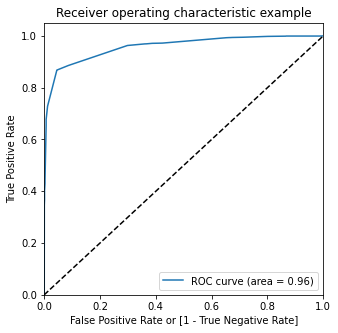

In [204]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [205]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.076031,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.076031,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.678511,3274,1,1,1,1,1,1,1,1,0,0,0
3,0,0.008063,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.968963,1667,1,1,1,1,1,1,1,1,1,1,1


In [206]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.801181  0.963103  0.701700
0.2   0.2  0.801181  0.963103  0.701700
0.3   0.3  0.921174  0.865828  0.955178
0.4   0.4  0.921174  0.865828  0.955178
0.5   0.5  0.921174  0.865828  0.955178
0.6   0.6  0.921174  0.865828  0.955178
0.7   0.7  0.889261  0.728721  0.987893
0.8   0.8  0.889261  0.728721  0.987893
0.9   0.9  0.873145  0.677987  0.993045


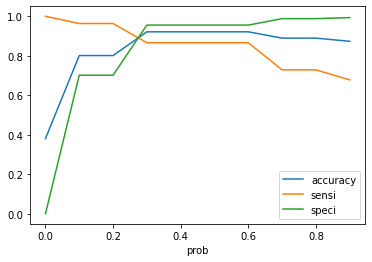

In [207]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [208]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.076031,9196,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.076031,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.678511,3274,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.008063,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.968963,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [209]:
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_predicted','lead_score']].head()

,Converted,Converted_prob,Prospect ID,final_predicted,lead_score
0,1,0.076031,9196,0,8
1,0,0.076031,4696,0,8
2,0,0.678511,3274,1,68
3,0,0.008063,2164,0,1
4,1,0.968963,1667,1,97


In [210]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9211744056167225

In [211]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3708,  174],
       [ 320, 2065]], dtype=int64)

In [212]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [213]:
# Sensitivity of Log regression model
TP / float(TP+FN)

0.8658280922431866

In [214]:
# Specificity
TN / float(TN+FP)

0.955177743431221

In [215]:
# False Positive
print(FP/ float(TN+FP))

0.04482225656877898


In [216]:
# Positive Predicter Value
print (TP / float(TP+FP))

0.9222867351496203


In [217]:
# Negative Value
print (TN / float(TN+ FN))

0.9205561072492552


In [218]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3708,  174],
       [ 320, 2065]], dtype=int64)

In [219]:
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9222867351496203

In [220]:
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8658280922431866

In [221]:
from sklearn.metrics import precision_score, recall_score

In [222]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9222867351496203

In [223]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8658280922431866

In [224]:
from sklearn.metrics import precision_recall_curve

In [225]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: Converted, Length: 6267, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: Predicted, Length: 6267, dtype: int64)

In [226]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

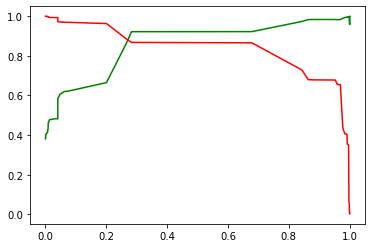

In [227]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [228]:
number_Cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [229]:
number_Cols = X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[number_Cols] = scaler.fit_transform(X_test[number_Cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [230]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
7681,0,1,0,0,0,0,0,0,0,1,0,0,0
984,0,1,1,0,1,0,0,0,0,0,0,0,0
8135,0,1,0,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,1,0,0,0
2712,0,0,0,0,0,0,0,0,0,0,1,0,0


In [231]:
X_test_sm = sm.add_constant(X_test)

In [232]:
y_test_pred = res.predict(X_test_sm)

In [233]:
y_test_pred[:10]

7681    0.076031
984     0.014496
8135    0.678511
6915    0.009733
2712    0.968963
244     0.001687
4698    0.201329
8287    0.041546
6791    0.968963
8970    0.008063
dtype: float64

In [234]:
y_prd_1 = pd.DataFrame(y_test_pred)
y_prd_1.head()

,0
7681,0.076031
984,0.014496
8135,0.678511
6915,0.009733
2712,0.968963


In [235]:
# Convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [236]:
y_test_df['Prospect ID'] = y_test_df.index

In [237]:
# remove index
y_prd_1.reset_index(drop=True, inplace = True)
y_test_df.reset_index(drop = True, inplace= True)

In [238]:
# Append to the y_test_df & y_pred_1
y_prd_final = pd.concat([y_test_df,y_prd_1],axis=1)

In [239]:
y_prd_final.head()

,Converted,Prospect ID,0
0,0,7681,0.076031
1,0,984,0.014496
2,0,8135,0.678511
3,0,6915,0.009733
4,1,2712,0.968963


In [240]:
# Rename column
y_prd_final = y_prd_final.rename(columns={0:'ConvertionProbab'})
y_prd_final.head()

,Converted,Prospect ID,ConvertionProbab
0,0,7681,0.076031
1,0,984,0.014496
2,0,8135,0.678511
3,0,6915,0.009733
4,1,2712,0.968963


In [241]:
# Rename column
y_prd_final = y_prd_final.rename(columns={0:'ConvertionProbab'})
y_prd_final.head()

,Converted,Prospect ID,ConvertionProbab
0,0,7681,0.076031
1,0,984,0.014496
2,0,8135,0.678511
3,0,6915,0.009733
4,1,2712,0.968963


In [242]:
# y_prediction final
y_prd_final.head()

,Converted,Prospect ID,ConvertionProbab
0,0,7681,0.076031
1,0,984,0.014496
2,0,8135,0.678511
3,0,6915,0.009733
4,1,2712,0.968963


In [243]:
y_prd_final['Final_Predicter'] = y_prd_final.ConvertionProbab.map(lambda x:1 if x > 0.3 else 0)

In [244]:
y_prd_final.head()

,Converted,Prospect ID,ConvertionProbab,Final_Predicter
0,0,7681,0.076031,0
1,0,984,0.014496,0
2,0,8135,0.678511,1
3,0,6915,0.009733,0
4,1,2712,0.968963,1


In [245]:
# check the overall accuracy
metrics.accuracy_score(y_prd_final.Converted,y_prd_final.Final_Predicter)

0.9233060312732688

In [246]:
Confusion_2 = metrics.confusion_matrix(y_prd_final.Converted,y_prd_final.Final_Predicter)
Confusion_2

array([[1602,   74],
       [ 132,  878]], dtype=int64)

In [247]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [248]:
# Sesitivity
TP/float(TP+FN)

0.8658280922431866

In [249]:
# Specificity
TN/float(TN+FP)

0.955177743431221

In [250]:
precision_score(y_prd_final.Converted, y_prd_final.Final_Predicter)

0.9222689075630253

In [251]:
recall_score(y_prd_final.Converted, y_prd_final.Final_Predicter)

0.8693069306930693